In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re

import mglearn
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, roc_curve

## Limpeza de dados

In [2]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Trabalho Final/imdbFull.p'

D = pickle.load(open(fN, 'rb'))

nDocs = 5000

corpus = D.data[:nDocs]
y = D.target[:nDocs]
y = [1 if val>5 else 0 for val in y]

print("Tamanho corpus: {} documentos".format(len(corpus)))
print("Distribuição de classes: ", np.bincount(y))

Tamanho corpus: 5000 documentos
Distribuição de classes:  [2496 2504]


In [3]:
text_train, text_test, y_train, y_test = train_test_split(corpus, y, test_size=0.5, stratify=y)

In [4]:
num_doc = 3

print("Tamanho corpus: {} documentos".format(len(text_train)))
print("Documento Nro {}: \n {}".format(num_doc+1, text_train[num_doc]))

Tamanho corpus: 2500 documentos
Documento Nro 4: 
 This interesting Giallo boosts a typical but still thrilling plot and a really sadistic killer that obviously likes to hunt his victims down before murdering them in gory ways.<br /><br />Directed by Emilio P. Miraglia who, one year earlier, also made the very interesting "La Notte che Evelyn Usci della Tomba" (see also my comment on that one), the film starts off a little slow, but all in all, no time is wasted with unnecessary sub plots or sequences.<br /><br />This film is a German-Italian coproduction, but it was released in Germany on video only in a version trimmed by 15 minutes of plot under the stupid title "Horror House". At least the murder scenes, which will satisfy every gorehound, are fully intact, and the viewer still gets the killer's motive at the end. But the Italian version containing all the footage is still the one to look for, of course.<br /><br />A convincing Giallo with obligatory twists and red herrings, "La Da

Limpeza de mudanças de linha

In [5]:
corpus1 = [critica.replace("<br />", " ") for critica in text_train]

In [6]:
print("Tamanho corpus: {} documentos".format(len(corpus1)))
print("Documento Nro {}: \n {} | Palavras: {}".format(num_doc+1, corpus1[num_doc], len(corpus1[num_doc].split())))

Tamanho corpus: 2500 documentos
Documento Nro 4: 
 This interesting Giallo boosts a typical but still thrilling plot and a really sadistic killer that obviously likes to hunt his victims down before murdering them in gory ways.  Directed by Emilio P. Miraglia who, one year earlier, also made the very interesting "La Notte che Evelyn Usci della Tomba" (see also my comment on that one), the film starts off a little slow, but all in all, no time is wasted with unnecessary sub plots or sequences.  This film is a German-Italian coproduction, but it was released in Germany on video only in a version trimmed by 15 minutes of plot under the stupid title "Horror House". At least the murder scenes, which will satisfy every gorehound, are fully intact, and the viewer still gets the killer's motive at the end. But the Italian version containing all the footage is still the one to look for, of course.  A convincing Giallo with obligatory twists and red herrings, "La Dama Rossa Uccide Sette Volte" i

Limpeza alfanumérica

In [7]:
corpus_alfanum = [re.sub(r'[^A-Za-z0-9]+', ' ', critica) for critica in corpus1]
print("Tamanho corpus: {} documentos".format(len(corpus_alfanum)))


Tamanho corpus: 2500 documentos


Limpeza alfabética

In [8]:
corpus_alfab = [re.sub(r'[^a-zA-Z]+', ' ', critica) for critica in corpus1]
print("Tamanho corpus: {} documentos".format(len(corpus_alfab)))


Tamanho corpus: 2500 documentos


Comparação limpeza alfanumérica e limpeza alfabética

- Sem limpeza

In [9]:
tf = TfidfVectorizer().fit(corpus1)
X_train = tf.transform(corpus1)

dicionario_sem_limpeza = len(tf.get_feature_names_out())

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)

print("Limpeza Alfanumérica: ")
print("Tamanho do dicionário: {}".format(len(tf.get_feature_names_out())))
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Limpeza Alfanumérica: 
Tamanho do dicionário: 28428
Mean cross-validation accuracy: 0.83


- Limpeza Alfanumérica: 

In [10]:
tf = TfidfVectorizer().fit(corpus_alfanum)
X_train = tf.transform(corpus_alfanum)

dicionario_limpeza_alfanumerica = len(tf.get_feature_names_out())

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)

print("Limpeza Alfanumérica: ")
print("Tamanho do dicionário: {}".format(len(tf.get_feature_names_out())))
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Limpeza Alfanumérica: 
Tamanho do dicionário: 28392
Mean cross-validation accuracy: 0.83


- Limpeza Alfabética

In [11]:
tf = TfidfVectorizer().fit(corpus_alfab)
X_train = tf.transform(corpus_alfab)

dicionario_limpeza_alfabetica = len(tf.get_feature_names_out())

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)

print("\nLimpeza Alfabética: ")
print("Tamanho do dicionário: {}".format(len(tf.get_feature_names_out())))
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))



Limpeza Alfabética: 
Tamanho do dicionário: 28006
Mean cross-validation accuracy: 0.84


<b>NOTA:</b> 
- Como a limpeza alfabética minimiza o tamanho do dicionário mantendo a precisão do classificador, será esta a limpeza/filtragem que irei usar no produto final. 

Stop Words

In [12]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english")) 

no_stop_words = [" ".join([(word if word not in (stop_words) else "") for word in critica.split()]) for critica in corpus_alfab]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anaso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
tf = TfidfVectorizer().fit(no_stop_words)
X_train = tf.transform(no_stop_words)

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)

print("\nLimpeza Alfabética: ")
print("Tamanho do dicionário: {}".format(len(tf.get_feature_names_out())))
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))


Limpeza Alfabética: 
Tamanho do dicionário: 27987
Mean cross-validation accuracy: 0.84


<b>NOTAS: </b> 
- As stop words correspondem às palavras com maior frequência de utilização no alfabeto inglês, pelo que estas palavras não serão as melhores para discriminar as avalições das criticas com base na informação textual da crítica. 
- Tal como anteriormente, existe uma diminuição no tamanho do vocabulário sem que a precisão do classificador fique comprometida, pelo que irei remover as stop words das criticas recolhidas no dataset IMDB. 


## Tokenização Vs Lemmatização

In [14]:
def tokenization(documents, stemmer_name="porter"):
    stem = {"porter": PorterStemmer(), 
            "lancaster": LancasterStemmer(), 
            "snowball": SnowballStemmer("english"), 
            "lemma": WordNetLemmatizer()} 

    stemmer = stem.get(stemmer_name) 

    if(stemmer_name=="lemma"):
        return [" ".join([stemmer.lemmatize(word, "v") for word in critic.split()]) for critic in documents]
    else:  
        return [" ".join([stemmer.stem(word) for word in critic.split()]) for critic in documents]

- Porter Stemmer

In [15]:
docs_porter = tokenization(no_stop_words, stemmer_name="porter")

tf_porter = TfidfVectorizer().fit(docs_porter)
X_train_porter = tf_porter.transform(docs_porter)

dicionario_porter = len(tf_porter.get_feature_names_out())

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_porter, y_train, cv=5)

print("\nLimpeza Alfabética: ")
print("Tamanho do dicionário: {}".format(len(tf_porter.get_feature_names_out())))
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))


Limpeza Alfabética: 
Tamanho do dicionário: 19269
Mean cross-validation accuracy: 0.84


- Snowball Stemmer

In [16]:
docs_snow = tokenization(no_stop_words, stemmer_name="snowball")  

tf_snowball = TfidfVectorizer().fit(docs_snow)
X_train_snoball = tf_snowball.transform(docs_snow)

dicionario_snowball = len(tf_snowball.get_feature_names_out())

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_snoball, y_train, cv=5)

print("\nLimpeza Alfabética: ")
print("Tamanho do dicionário: {}".format(len(tf_snowball.get_feature_names_out())))
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))


Limpeza Alfabética: 
Tamanho do dicionário: 18982
Mean cross-validation accuracy: 0.84


- Lancaster Stemmer

In [17]:
docs_lanc = tokenization(no_stop_words, stemmer_name="lancaster")

tf_lancaster = TfidfVectorizer().fit(docs_lanc)
X_train_lancaster = tf_lancaster.transform(docs_lanc)

dicionario_lancaster = len(tf_lancaster.get_feature_names_out())

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_lancaster, y_train, cv=5)

print("\nLimpeza Alfabética: ")
print("Tamanho do dicionário: {}".format(len(tf_lancaster.get_feature_names_out())))
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))


Limpeza Alfabética: 
Tamanho do dicionário: 15900
Mean cross-validation accuracy: 0.84


- Lematização

In [18]:
docs_lemma = tokenization(no_stop_words, stemmer_name="lemma")  

tf_lemma = TfidfVectorizer().fit(docs_lemma)
X_train_lemma = tf_lemma.transform(docs_lemma)

dicionario_lemma = len(tf_lemma.get_feature_names_out())

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_lemma, y_train, cv=5)

print("\nLimpeza Alfabética: ")
print("Tamanho do dicionário: {}".format(len(tf_lemma.get_feature_names_out())))
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))


Limpeza Alfabética: 
Tamanho do dicionário: 23879
Mean cross-validation accuracy: 0.84


### Comparação

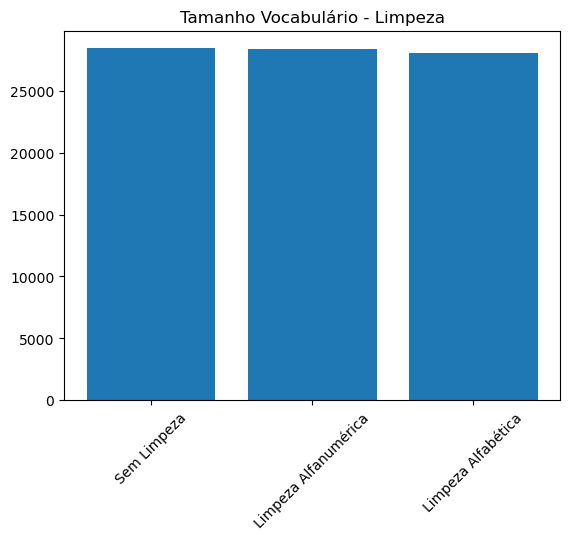

Tamanho vocabulário Sem Limpeza : 28428
Tamanho vocabulário Limpeza Alfanumérica : 28392
Tamanho vocabulário Limpeza Alfabética : 28006


In [19]:
dicionarios = ['Sem Limpeza', 'Limpeza Alfanumérica', 'Limpeza Alfabética']
tamanhos = [dicionario_sem_limpeza, dicionario_limpeza_alfanumerica, dicionario_limpeza_alfabetica]

plt.figure()
plt.title("Tamanho Vocabulário - Limpeza")
plt.bar(dicionarios, tamanhos)
plt.xticks(rotation = 45)
plt.show()

for i in range(len(dicionarios)): 
    print("Tamanho vocabulário", dicionarios[i], ':', tamanhos[i] )


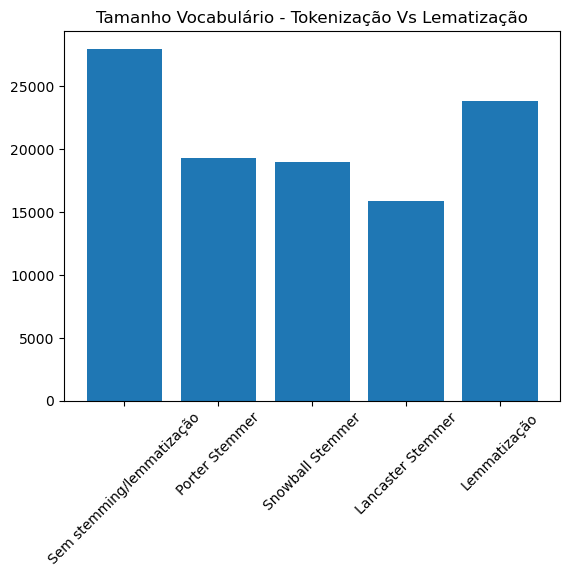

Tamanho vocabulário Sem stemming/lemmatização : 28006
Tamanho vocabulário Porter Stemmer : 19269
Tamanho vocabulário Snowball Stemmer : 18982
Tamanho vocabulário Lancaster Stemmer : 15900
Tamanho vocabulário Lemmatização : 23879


In [20]:
dicionarios = ['Sem stemming/lemmatização', 'Porter Stemmer', 'Snowball Stemmer', 'Lancaster Stemmer', 'Lemmatização']
tamanhos = [dicionario_limpeza_alfabetica, dicionario_porter, dicionario_snowball, dicionario_lancaster, dicionario_lemma]

plt.figure()
plt.title("Tamanho Vocabulário - Tokenização Vs Lematização")
plt.bar(dicionarios, tamanhos)
plt.xticks(rotation = 45)
plt.show()

for i in range(len(dicionarios)): 
    print("Tamanho vocabulário", dicionarios[i], ':', tamanhos[i] )

In [21]:
lr = LogisticRegression(max_iter=10000)

y_train_porter = lr.fit(X_train_porter, y_train)
fpr_porter, tpr_porter, thresholds_porter = roc_curve(y_train, lr.predict_proba(X_train_porter)[:, 1])

y_train_snow = lr.fit(X_train_snoball, y_train)
fpr_snow, tpr_snow, thresholds_snow = roc_curve(y_train, lr.predict_proba(X_train_snoball)[:, 1])

y_train_lanc = lr.fit(X_train_lancaster, y_train)
fpr_lanc, tpr_lanc, thresholds_lanc = roc_curve(y_train, lr.predict_proba(X_train_lancaster)[:, 1])

y_train_lemma = lr.fit(X_train_lemma, y_train)
fpr_lemma, tpr_lemma, thresholds_lemma = roc_curve(y_train, lr.predict_proba(X_train_lemma)[:, 1])


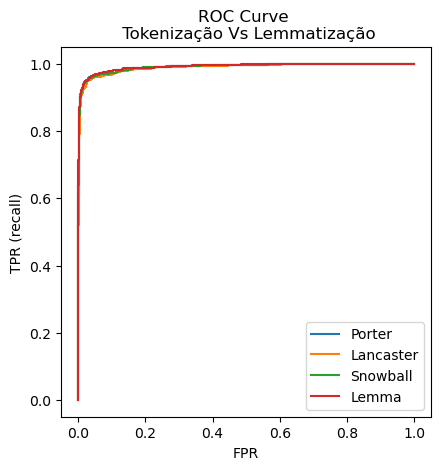

In [22]:
plt.figure()
plt.title("ROC Curve \n Tokenização Vs Lemmatização")
plt.plot(fpr_porter, tpr_porter, label="Porter")
plt.plot(fpr_lanc, tpr_lanc, label="Lancaster")
plt.plot(fpr_snow, tpr_snow, label="Snowball")
plt.plot(fpr_lemma, tpr_lemma, label="Lemma")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.axis("scaled")
plt.legend()

<b>NOTAS:</b>
- A tokenização reduz palavras à sua raiz comum. No entanto, este processo não tem em consideração a composição natural das palavras. Por exemplo, palavras como "car" e "care" são ambas convertidas para "car", eliminando o contexto das mesmas. 
- A lemmatização é um processo identifico à tokenização, porém considera a composição natural das palavras. Assim, e conforme o exemplo acima as palavras "car" e "care" são mantidas na sua forma canónica, nunca perdendo o seu contexto.
- Devido aos fatores explicados acima, e após a extração de caracteristicas, a tokenização minimiza o tamanho do dicionário, enquanto que a lematização produz mais tokens. Ainda assim, qualquer um destes processos, diminui o tamanho original de tokens. 
- Tendo em consideração que pretendo classificar as criticas no dataset do IMDB com base na sua informação textual, o significado das palavras é bastante importante. Por isso, e que com este pré-processamento do texto melhora os resultados do classificador, irei utilizar a lematização para a análise pretendida.   